In [2]:
import pandas as pd

df = pd.read_csv("Online_Retail.csv", encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    InvoiceNo TEXT,
    StockCode TEXT,
    Description TEXT,
    Quantity INTEGER,
    InvoiceDate TEXT,
    UnitPrice REAL,
    CustomerID TEXT,
    Country TEXT
)
""")
conn.commit()


In [4]:
# Insert the data into the SQLite table
df.to_sql("sales", conn, if_exists='replace', index=False)


541909

In [5]:
query = """
SELECT Description AS product,
       SUM(Quantity) AS total_qty,
       SUM(Quantity * UnitPrice) AS revenue
FROM sales
WHERE Description IS NOT NULL
GROUP BY product
ORDER BY revenue DESC
LIMIT 10
"""

summary_df = pd.read_sql_query(query, conn)
print(summary_df)


                              product  total_qty    revenue
0                      DOTCOM POSTAGE        707  206245.48
1            REGENCY CAKESTAND 3 TIER      13033  164762.19
2  WHITE HANGING HEART T-LIGHT HOLDER      35317   99668.47
3                       PARTY BUNTING      18022   98302.98
4             JUMBO BAG RED RETROSPOT      47363   92356.03
5                  RABBIT NIGHT LIGHT      30680   66756.59
6                             POSTAGE       3003   66230.64
7     PAPER CHAIN KIT 50'S CHRISTMAS       18902   63791.94
8       ASSORTED COLOUR BIRD ORNAMENT      36381   58959.73
9                       CHILLI LIGHTS      10229   53768.06


In [7]:
query2 = """
SELECT Country,
       SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY Country
ORDER BY revenue DESC
LIMIT 5
"""
df2 = pd.read_sql_query(query2, conn)
print("Top 5 Countries by Revenue:\n", df2)


Top 5 Countries by Revenue:
           Country       revenue
0  United Kingdom  8.187806e+06
1     Netherlands  2.846615e+05
2            EIRE  2.632768e+05
3         Germany  2.216982e+05
4          France  1.974039e+05


In [8]:
query3 = """
SELECT COUNT(DISTINCT Description) AS unique_products
FROM sales
WHERE Description IS NOT NULL
"""
df3 = pd.read_sql_query(query3, conn)
print("Unique Products Sold:\n", df3)


Unique Products Sold:
    unique_products
0             4223


In [9]:
query6 = """
SELECT Description, SUM(Quantity * UnitPrice) AS total_loss
FROM sales
WHERE Quantity < 0
GROUP BY Description
ORDER BY total_loss ASC
LIMIT 5
"""
df6 = pd.read_sql_query(query6, conn)
print("Top Returned Products:\n", df6)


Top Returned Products:
                       Description  total_loss
0                      AMAZON FEE  -235281.59
1     PAPER CRAFT , LITTLE BIRDIE  -168469.60
2                          Manual  -146784.46
3  MEDIUM CERAMIC TOP STORAGE JAR   -77479.64
4                         POSTAGE   -11871.24


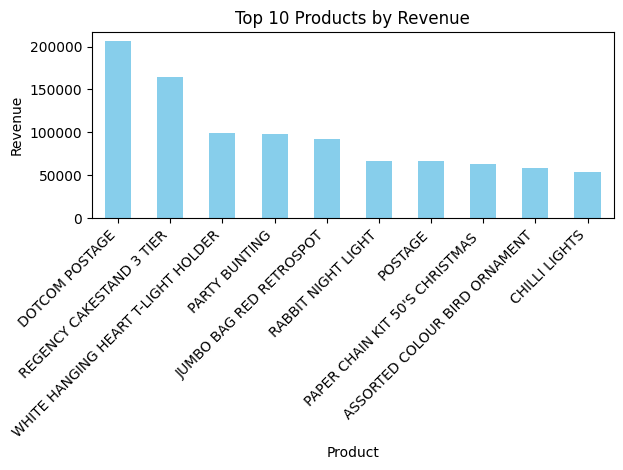

In [6]:
import matplotlib.pyplot as plt

# Plot
summary_df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
